In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random

Store information about directories containing (**similar / dissimilar**) image's classes.

In [2]:
dataset_root_path = "lfw_funneled"
classes_paths = []

for dir in os.scandir(dataset_root_path):
    classes_paths.append([])
    
    for file in os.scandir(dir.path):
        if file.is_file():
            classes_paths[-1].append(file.path)

print(f"{len(classes_paths)} classes.")

5749 classes.


Put everything togather!

In [ ]:
class CustomLoader(tf.keras.utils.Sequence):

    def __init__(self, dataset_path, batch_size, input_shape=(250, 250)):
        self.input_shape = input_shape
        self.batch_size = batch_size

        self.dataset_path = dataset_path
        self.classes_paths = []
        
        for dir in os.scandir(self.dataset_path):
            self.classes_paths.append([])
            
            for file in os.scandir(dir.path):
                if file.is_file():
                    self.classes_paths[-1].append(file.path)
        
        # claculate the total number of batches
        self.batches_num = len(self.classes_paths) // self.batch_size
    
    def load_img(self, path):
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)
        return image_arr / 255

    # the training algorithm (model.fit()) will call this funtion to get the n'th batch of the dataset
    def __getitem__(self, n):
        
        paths_batch = self.classes_paths[n*self.batch_size : (n+1)*self.batch_size]

        X = np.zeros((self.batch_size, 2, self.input_shape[1], self.input_shape[0], 3))
        Y = np.zeros((self.batch_size, 1))

        for i in range(self.batch_size):
            sample_class_1 = random.choice(paths_batch)
            sample_class_2 = random.choice(paths_batch)

            X[i][0] = self.load_img(random.choice(sample_class_1))
            X[i][1] = self.load_img(random.choice(sample_class_2))
            
            if sample_class_1 == sample_class_2:
                Y[i] = 1
            else:
                Y[i] = 0

        return X, Y

    # returns the number of batches in the dataset
    def __len__(self):
        return self.batches_num
    
    # called at the end of the epoch
    def on_epoch_end(self):
        # shuffle the paths of images at the end of each epoch
        np.random.shuffle(self.classes_paths)

Test the **CustomLoader**

In [4]:
train_loader = CustomLoader(dataset_path="lfw_funneled", batch_size=32, input_shape=(250, 250))

input batch shape is (32, 2, 250, 250, 3)
output batch shape is (32, 1)
label is : 0.0


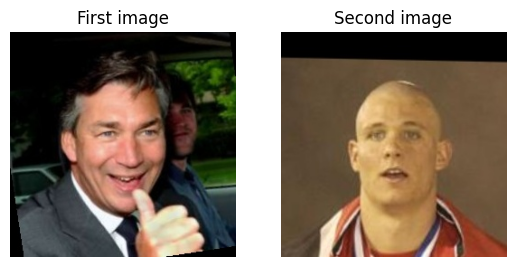

In [6]:
# get sample batch
X, Y = train_loader[random.randint(0, len(train_loader)-1)]

# get sample pair
x_pair = X[random.randint(0, len(X)-1)]
y_label = Y[random.randint(0, len(Y)-1)]

print(f"input batch shape is {X.shape}")
print(f"output batch shape is {Y.shape}")
print(f"label is : {y_label[0]}")

# show a sample image pair
plt.subplot(1, 2, 1)
plt.imshow(x_pair[0])
plt.axis('off')
plt.title("First image")

plt.subplot(1, 2, 2)
plt.imshow(x_pair[1])
plt.axis('off')
plt.title("Second image")

plt.show()

Real Example:

In [ ]:
train_loader = CustomLoader(dataset_path="lfw_funneled", batch_size=32, input_shape=(250, 250))

val_loader = CustomLoader(dataset_path="path-to-validation-dataset", batch_size=32, input_shape=(250, 250))

# TODO: test on real model
model = tf.keras.Sequential()

model.fit(train_loader, validation_data=val_loader, epochs=100)